In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Cell 1: FFT of an Image (Magnitude + Phase) --> Slide[52]**

[[-2909.           +0.j          -799.04283521-6408.02485444j
  -1879.67992124+3581.74942617j ...  6652.57330469-7661.25261831j
  -1879.67992124-3581.74942617j  -799.04283521+6408.02485444j]
 [-1725.21782467+4400.99014301j -3512.07275334+1617.06778598j
  -1546.14240188+3709.16189627j ...  5025.39764204-5217.48510604j
   -275.81789149 -943.99905983j  -291.60934276+1907.35410893j]
 [  211.85046285+3816.68230438j -2836.57126374 +357.94557846j
   2012.27572653-1557.79202293j ...  2219.52069809-3152.57231981j
  -2849.16704831+1957.77087064j   -82.35291738 -294.70859941j]
 ...
 [ 3759.94133844-2129.19326105j   382.8730423  +842.28846169j
   -733.8344574  +523.86971077j ... -1594.46663073+1882.39687565j
   5440.56993765+2019.3172163j   -578.03003901-1687.93291366j]
 [  211.85046285-3816.68230438j   -82.35291738 +294.70859941j
  -2849.16704831-1957.77087064j ...  4395.30673397+3893.16437474j
   2012.27572653+1557.79202293j -2836.57126374 -357.94557846j]
 [-1725.21782467-4400.99014301j  -291.60

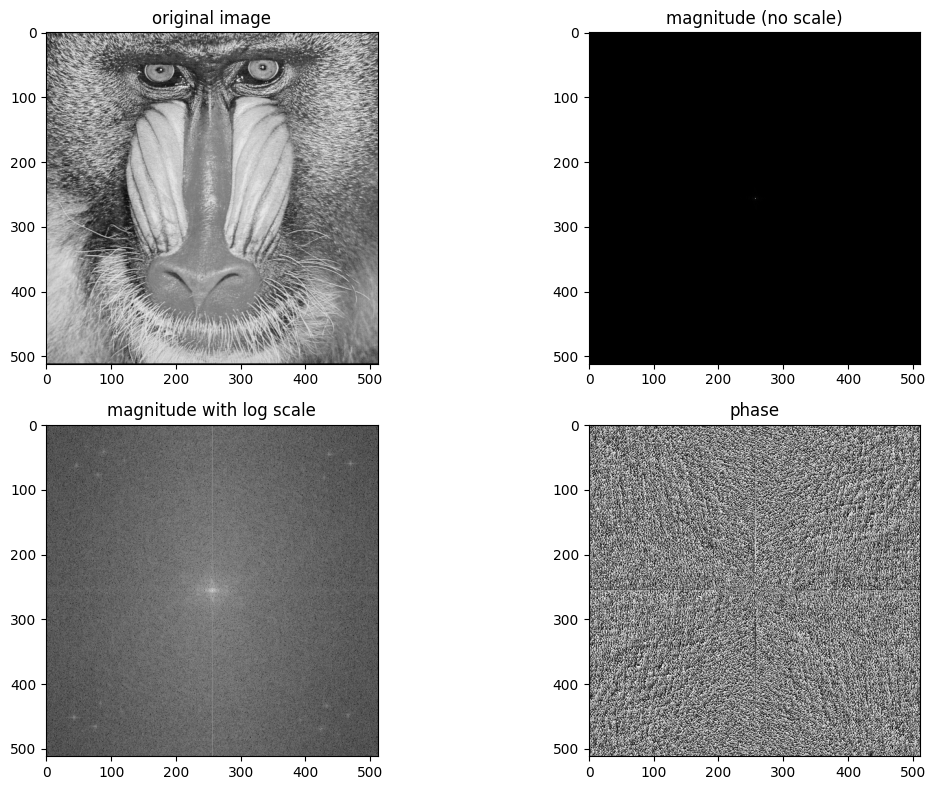

In [2]:
im = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D FFT and shift the zero frequency components to the center
fft_result = np.fft.fftshift(np.fft.fft2(im))
print(fft_result)

# Calculate the magnitude and phase of the FFT
mag = np.abs(fft_result)
log_mag = np.log1p(mag)
phase = np.angle(fft_result)

# Display the original image, magnitude, magnitude with log scale, and phase
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('original image')

plt.subplot(2, 2, 2)
plt.imshow(mag, cmap='gray')
plt.title('magnitude (no scale)')

plt.subplot(2, 2, 3)
plt.imshow(log_mag, cmap='gray')
plt.title('magnitude with log scale')

plt.subplot(2, 2, 4)
plt.imshow(phase, cmap='gray')
plt.title('phase')

plt.tight_layout()
plt.show()

# **Cell 2: Fourier Plane --> Slides[68-87]**

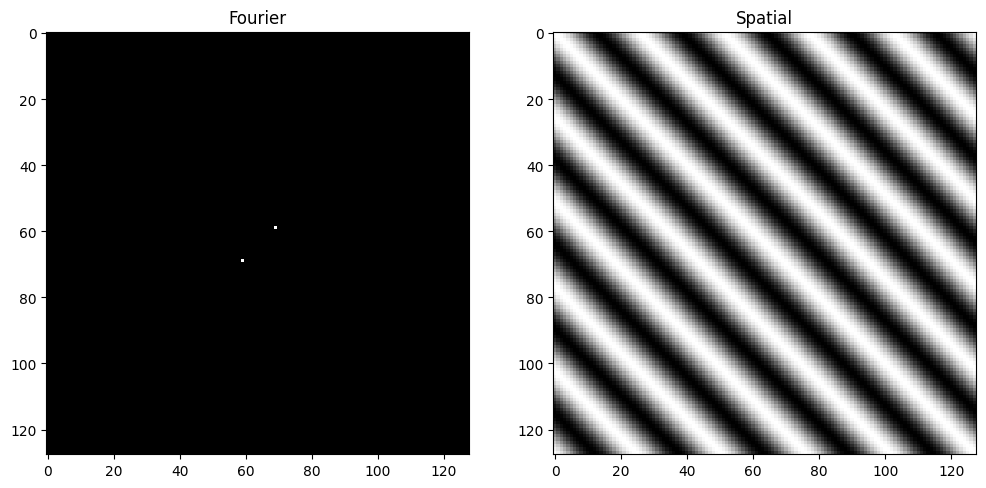

In [3]:
x = 128
y = 128
ft_img = np.zeros((x, y))
distance = 5  # until 64

ft_img[int(y/2) + distance, int(x/2) - distance] = 255
ft_img[int(y/2) - distance, int(x/2) + distance] = 255

img = np.fft.ifftshift(ft_img)
sp_img = np.fft.ifft2(img).real

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(ft_img, cmap='gray')
plt.title('Fourier')
plt.subplot(1, 2, 2)
plt.imshow(sp_img, cmap='gray')
plt.title('Spatial')
plt.show()


# **Cell 3: Composing basis functions --> Slides[106, 107]**

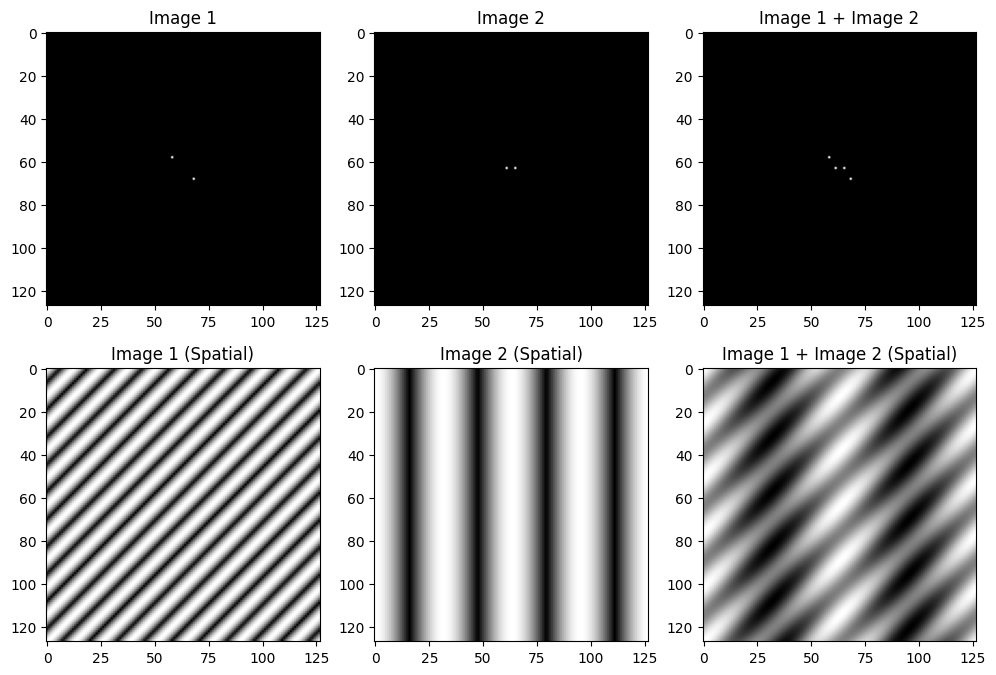

In [4]:
x = 127
y = 127

# IMAGE1
im1 = np.zeros((y, x), dtype=np.uint8)
distance = 5

im1[int(y/2) + distance, int(x/2) + distance] = 255
im1[int(y/2) - distance, int(x/2) - distance] = 255

out1 = np.fft.ifftshift(im1)
out1 = np.abs(np.fft.ifft2(out1))

# IMAGE2
im2 = np.zeros((y, x), dtype=np.uint8)
distance = 2

im2[int(y/2), int(x/2) - distance] = 255
im2[int(y/2), int(x/2) + distance] = 255

out2 = np.fft.ifftshift(im2)
out2 = np.abs(np.fft.ifft2(out2))

# SUM
im_sum = im1 + im2
out_sum = np.fft.ifftshift(im_sum)
out_sum = np.real(np.fft.ifft2(out_sum))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(im1, cmap='gray')
plt.title('Image 1')

plt.subplot(2, 3, 2)
plt.imshow(im2, cmap='gray')
plt.title('Image 2')

plt.subplot(2, 3, 3)
plt.imshow(im_sum, cmap='gray')
plt.title('Image 1 + Image 2')

plt.subplot(2, 3, 4)
plt.imshow(out1, cmap='gray')
plt.title('Image 1 (Spatial)')

plt.subplot(2, 3, 5)
plt.imshow(out2, cmap='gray')
plt.title('Image 2 (Spatial)')

plt.subplot(2, 3, 6)
plt.imshow(out_sum, cmap='gray')
plt.title('Image 1 + Image 2 (Spatial)')

plt.show()


# **Cell 4: Relationship between magnitude and phase --> Slides[91-96]**


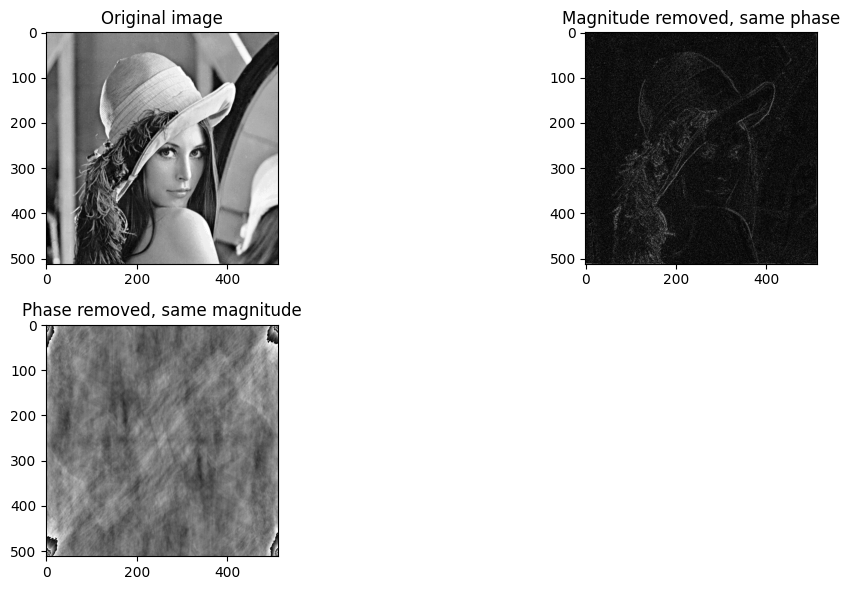

In [5]:
og_image = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp', cv2.IMREAD_GRAYSCALE)

# Convert the image to double precision
im = np.double(og_image)

# Calculate the 2D FFT
im_fft = np.fft.fft2(im)

# Find the magnitudes and phase responses
mag = np.abs(im_fft)  # magnitude
pha = np.angle(im_fft)  # phase

mag_ones = np.ones_like(mag)
phase_zeros = np.zeros_like(pha)

# Remove magnitude (out1) and phase (out2)
out1 = mag_ones * np.exp(1j * pha)
out2 = mag * np.exp(1j * phase_zeros)

# Find the inverse images
out1 = np.abs(np.fft.ifft2(out1))
out2 = np.abs(np.fft.ifft2(out2))

# Normalize and convert to uint8 for display
out1 = np.uint8(255 * (out1 - np.min(out1)) / (np.max(out1) - np.min(out1)))
out2 = out2.astype(np.uint8)

# Show the images
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(og_image, cmap='gray')
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(out1, cmap='gray', vmin=0, vmax=255)
plt.title('Magnitude removed, same phase')

plt.subplot(2, 2, 3)
plt.imshow(out2, cmap='gray', vmin=0, vmax=255)
plt.title('Phase removed, same magnitude')

plt.tight_layout()
plt.show()


# **Cell 5: Phase switching --> Slides[113, 114]**




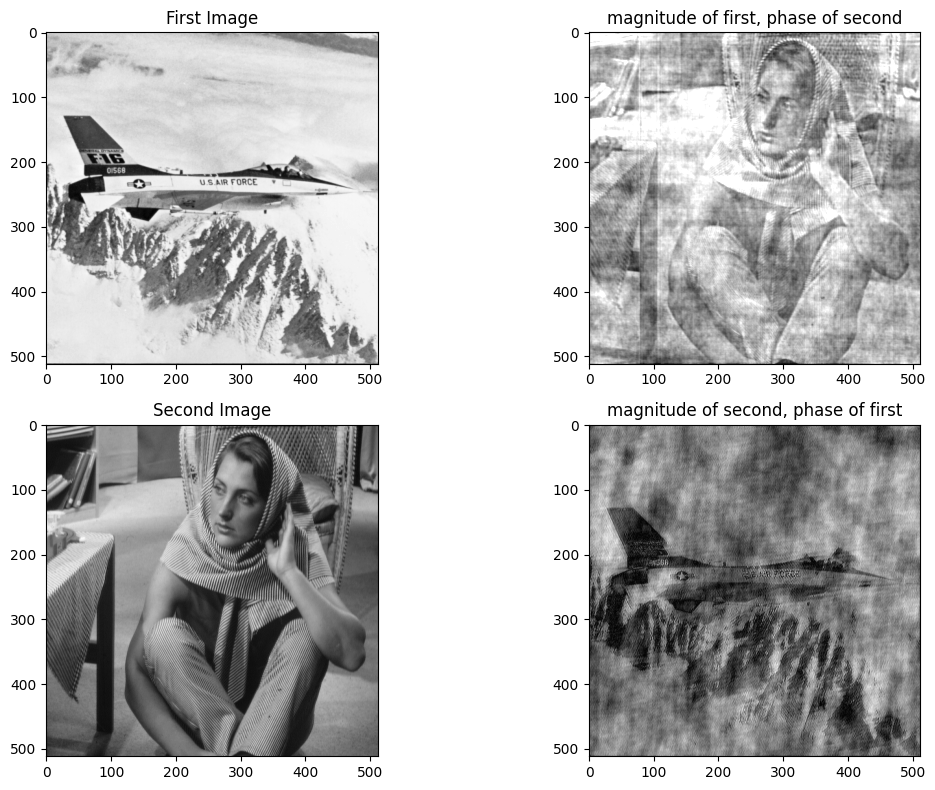

In [6]:
Image1 = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/F16.bmp', cv2.IMREAD_GRAYSCALE).astype(float)
Image2 = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Barbara.bmp', cv2.IMREAD_GRAYSCALE).astype(float)

# Compute the 2D FFTs
Image1_FFT = np.fft.fft2(Image1)
Image2_FFT = np.fft.fft2(Image2)

# Find the magnitudes and phase responses
mag1 = np.abs(Image1_FFT)
mag2 = np.abs(Image2_FFT)
pha1 = np.angle(Image1_FFT)
pha2 = np.angle(Image2_FFT)

# Recompute frequency responses by swapping the phases
out1 = mag1 * np.exp(1j * pha2)
out2 = mag2 * np.exp(1j * pha1)

# Find the inverse images
out1 = np.abs(np.fft.ifft2(out1))
out2 = np.abs(np.fft.ifft2(out2))

# Show the images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(Image1.astype(np.uint8), cmap='gray')
plt.title('First Image')

plt.subplot(2, 2, 2)
plt.imshow(out1, cmap='gray', vmin=0, vmax=255)
plt.title('magnitude of first, phase of second')

plt.subplot(2, 2, 3)
plt.imshow(Image2.astype(np.uint8), cmap='gray')
plt.title('Second Image')

plt.subplot(2, 2, 4)
plt.imshow(out2, cmap='gray', vmin=0, vmax=255)
plt.title('magnitude of second, phase of first')

plt.tight_layout()
plt.show()


# **Cell 6: Zeroing the Fourier coefficients --> Slides[123, 124]**


MSE = 14885.12335614487


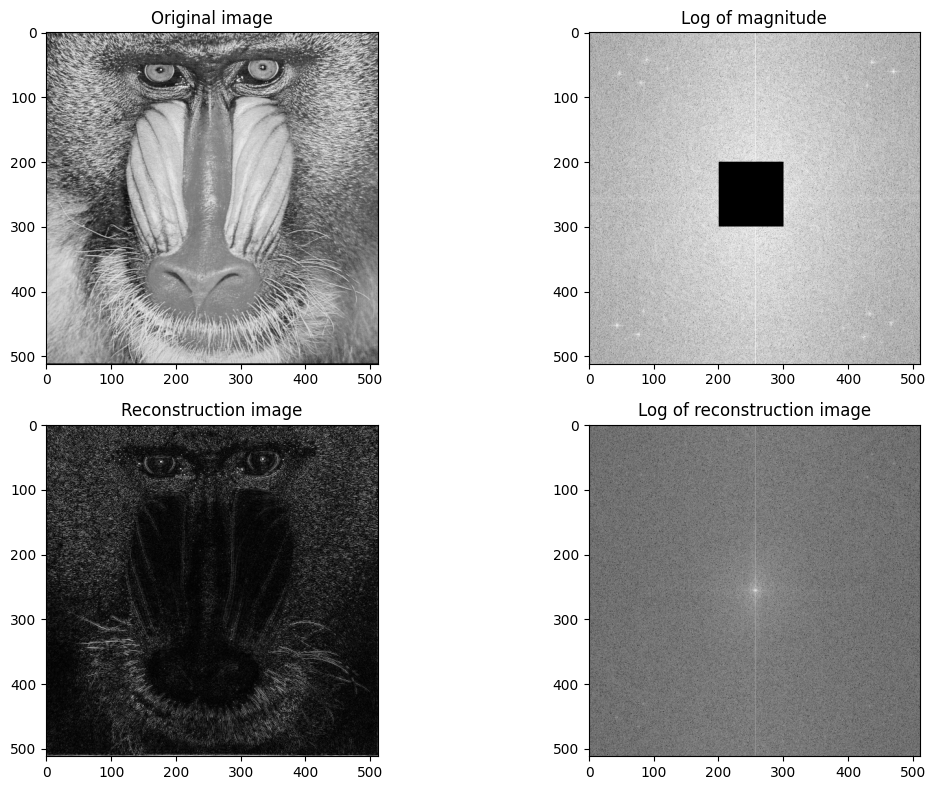

In [7]:
im = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp', cv2.IMREAD_GRAYSCALE)

# Calculate the 2D FFT and shift the zero frequency components to the center
fft_result = np.fft.fftshift(np.fft.fft2(im))

fft_result[200:300, 200:300] = 0

rec_im = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_result)))

fft_result2 = np.fft.fftshift(np.fft.fft2(rec_im))

mag = np.abs(fft_result)
i,j = np.unravel_index(mag.argmax(), mag.shape)

log_mag = np.log1p(mag)

mag2 = np.abs(fft_result2)
log_mag2 = np.log1p(mag2)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original image')

plt.subplot(2, 2, 2)
plt.imshow(log_mag, cmap='gray')
plt.title('Log of magnitude')

plt.subplot(2, 2, 3)
plt.imshow(rec_im, cmap='gray')
plt.title('Reconstruction image')

plt.subplot(2, 2, 4)
plt.imshow(log_mag2, cmap='gray')
plt.title('Log of reconstruction image')


mse = mean_squared_error(im, rec_im)
print("MSE =", mse)

plt.tight_layout()
plt.show()


# **Cell 8: Ideal filter --> Slides[109-112]**


<ipython-input-8-43b7d376a098>:31: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(out)), cmap='gray')


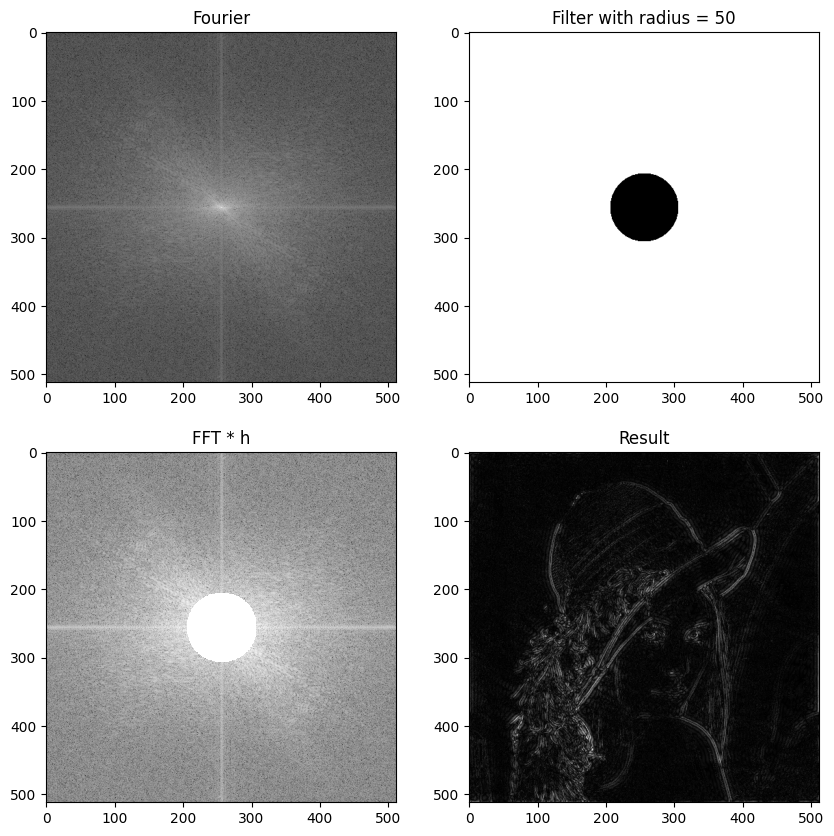

In [8]:
im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'), cv2.COLOR_BGR2GRAY)

m, n = im.shape

# Create a circle filter with a specified radius
x, y = np.meshgrid(np.arange(-m/2, m/2), np.arange(-n/2, n/2))
z = np.sqrt(x**2 + y**2)

r = 50  # Radius (or cut_off frequency)
h = z < r  # Filter

# Uncomment the following line for high pass instead of low pass filter
h = 1 - h

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))

out = im_fft * h
result = np.abs(np.fft.ifft2(np.fft.ifftshift(out)))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 2, 2)
plt.imshow(h, cmap='gray')
plt.title(f'Filter with radius = {r}')

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(out)), cmap='gray')
plt.title('FFT * h')

plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray')
plt.title('Result')

plt.show()

# **Cell 9: Butterworth filter --> Slides[113-115]**


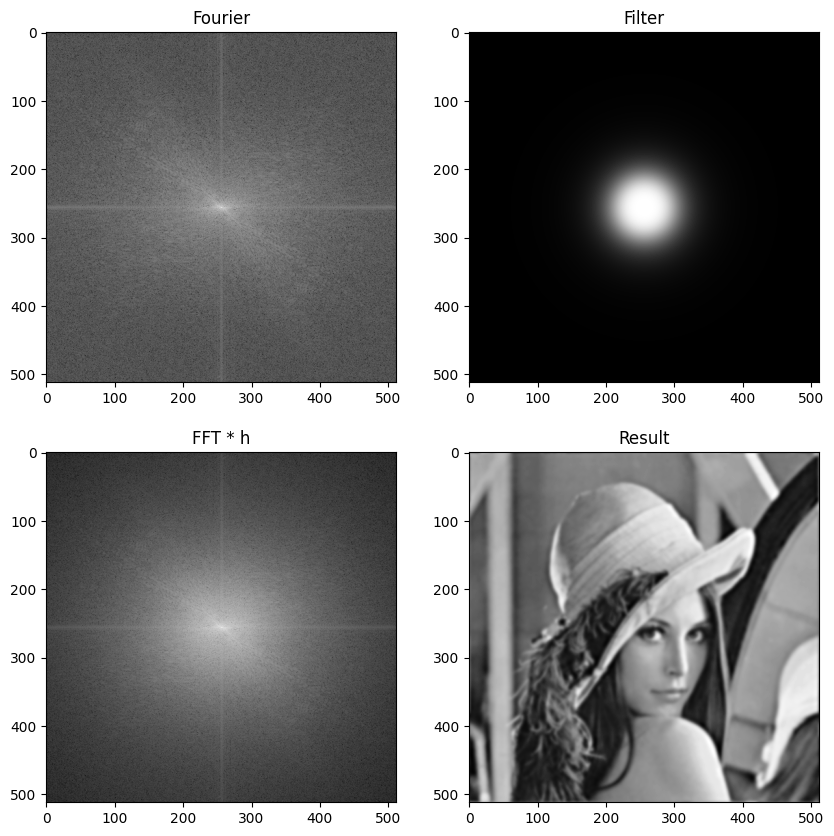

In [9]:
im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'), cv2.COLOR_BGR2GRAY)

m, n = im.shape

# Create a circle filter with a specified cutoff frequency
[x, y] = np.meshgrid(np.arange(-m/2, m/2), np.arange(-n/2, n/2))
D = np.sqrt(x**2 + y**2)
n = 2  # The higher n is, the closer it gets to ideal
D0 = 50  # Cutoff frequency

h = 1 / (1 + (D/D0)**(2*n))  # Filter

# Uncomment the following line for high pass instead of low pass
# h = 1 - h

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))

fft_result = im_fft * h
image_back = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_result)))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 2, 2)
plt.imshow(h, cmap='gray')
plt.title('Filter')

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(fft_result)), cmap='gray')
plt.title('FFT * h')

plt.subplot(2, 2, 4)
plt.imshow(image_back, cmap='gray')
plt.title('Result')

plt.show()

# **Cell 10: Guassian filter --> Slides[116-120]**


<ipython-input-10-814e49b7357f>:31: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(out)), cmap='gray')


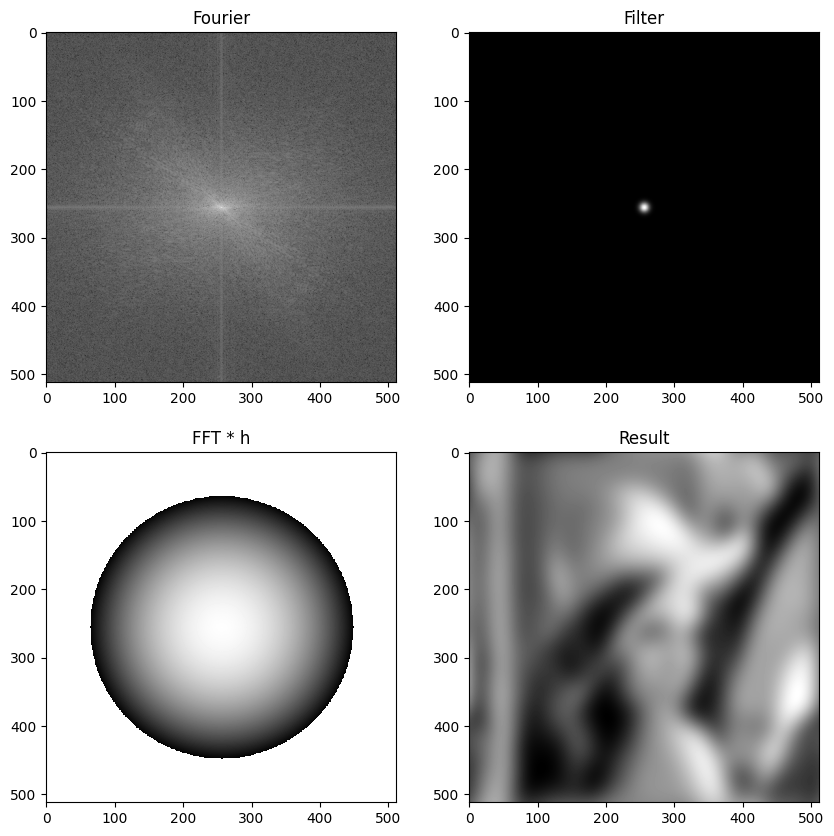

In [10]:
im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'), cv2.COLOR_BGR2GRAY)

m, n = im.shape

# Create a Gaussian low-pass filter
[x, y] = np.meshgrid(np.arange(-m/2, m/2), np.arange(-n/2, n/2))
D = np.sqrt(x**2 + y**2)
D0 = 5  # Standard deviation

h = np.exp(-D**2 / (2 * (D0**2)))  # Filter

# Uncomment the following line for high pass instead of low pass
# h = 1 - h

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))

out = im_fft * h
result = np.abs(np.fft.ifft2(np.fft.ifftshift(out)))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 2, 2)
plt.imshow(h, cmap='gray')
plt.title('Filter')

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(out)), cmap='gray')
plt.title('FFT * h')

plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray')
plt.title('Result')

plt.show()

# **Cell 11: Laplacian filter --> Slides[127-129]**


<ipython-input-11-8d4728f7e67c>:33: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(out)), cmap='gray')


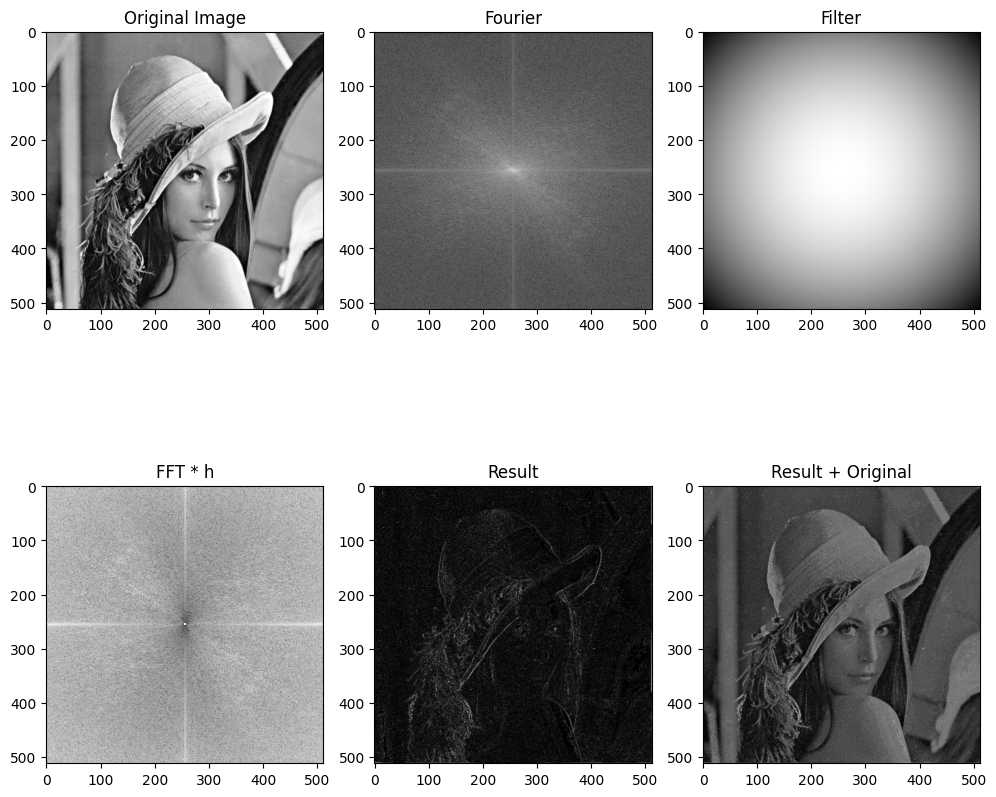

In [11]:
im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp'), cv2.COLOR_BGR2GRAY)

m, n = im.shape

[x, y] = np.meshgrid(np.arange(-m//2, m//2), np.arange(-n//2, n//2))
D = np.sqrt(x**2 + y**2)

h = -4 * (np.pi ** 2) * (D**2)

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))

out = im_fft * h
result = np.abs(np.fft.ifft2(np.fft.ifftshift(out)))

result = cv2.normalize(result, None, 0, 255, norm_type=cv2.NORM_MINMAX)
enhanced_image = im + result

plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 3, 3)
plt.imshow(h, cmap='gray')
plt.title('Filter')

plt.subplot(2, 3, 4)
plt.imshow(np.log(np.abs(out)), cmap='gray')
plt.title('FFT * h')

plt.subplot(2, 3, 5)
plt.imshow(result, cmap='gray')
plt.title('Result')

plt.subplot(2, 3, 6)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Result + Original')

plt.tight_layout()
plt.show()

# **Cell 12: Bandreject filter --> Slides[136-138]**


In [12]:
im = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/duck.bmp'), cv2.COLOR_BGR2GRAY)

m, n = im.shape

# Create a bandpass or bandreject filter using two radii
[x, y] = np.meshgrid(np.arange(-m/2, m/2), np.arange(-n/2, n/2))
z = np.sqrt(x**2 + y**2)
r1 = 15 # Inner radius
r2 = 17  # Outer radius
h = (z > r1) & (z < r2)  # The filter

# Uncomment the following line for band reject instead of band pass
h = 1 - h

# Perform Fourier operations
im_fft = np.fft.fftshift(np.fft.fft2(im))

out = im_fft * h
result = np.abs(np.fft.ifft2(np.fft.ifftshift(out)))

plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(np.log(np.abs(im_fft)), cmap='gray')
plt.title('Fourier')

plt.subplot(2, 3, 3)
plt.imshow(h, cmap='gray')
plt.title('Filter')

plt.subplot(2, 3, 4)
plt.imshow(np.log(np.abs(out)), cmap='gray')
plt.title('FFT * h')

plt.subplot(2, 3, 5)
plt.imshow(result, cmap='gray')
plt.title('Result')

plt.tight_layout()
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
